In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

pd.DataFrame.iteritems = pd.DataFrame.items

In [2]:
def extract_numerical_substrings(input_string):
    # Use regular expression to find all substrings with numerical characters
    numerical_substrings = re.findall(r'\d+', input_string)
    return numerical_substrings

In [3]:
dataset_dir = 'WikiText/'
results_dir = 'trained_models_'

In [4]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "6qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_FNet96_69086.txt
Found 'Test ppl' in line: Val. Loss: 5.174 |  Val. ppl: 176.54431016409583 | Val. Accuracy: 0.217	 Test Loss: 5.096 |  Test ppl: 163.35573288750876 | Test Accuracy: 0.219
Extracted numerical substrings: ['5', '174', '176', '54431016409583', '0', '217', '5', '096', '163', '35573288750876', '0', '219']
Reading file: results_LSTM96_150739.txt
Found 'Test ppl' in line: Val. Loss: 5.679 |  Val. ppl: 292.6728138657957 | Val. Accuracy: 0.209	 Test Loss: 5.621 |  Test ppl: 276.2829216632445 | Test Accuracy: 0.211
Extracted numerical substrings: ['5', '679', '292', '6728138657957', '0', '209', '5', '621', '276', '2829216632445', '0', '211']
Reading file: results_LSTM128_811781.txt
Found 'Test ppl' in line: Val. Loss: 5.552 |  Val. ppl: 257.72160931641724 | Val. Accuracy: 0.217	 Test Loss: 5.490 |  Test ppl: 242.1500167005254 | Test Accuracy: 0.217
Extracted numerical substrings: ['5', '552', '257', '72160931641724', '0', '217', '5', '490', '242', '15001670

In [5]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot.columns = df_pivot.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot.columns = df_pivot.columns.str.replace('6qbits', '6 qbits')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot = df_pivot.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot = df_pivot.dropna(how='all')
df_pivot = df_pivot.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame: Model     FNet128      FNet96     LSTM128      LSTM96  Quixer (6 qbits)  \
0      154.534328  157.739300  232.967738  257.637610        180.556299   
1      155.896697  163.079695  233.369802  260.995394        181.232787   
2      156.066402  163.355733  235.460434  261.451069        182.006916   
3      157.067880  163.441514  237.217524  262.188005        185.461636   
4      157.763233  163.771798  237.894583  265.801466        187.166909   
5      158.021933  164.524017  238.948091  267.931025        187.259224   
6      159.043528  164.668315  240.513021  268.825412        188.595788   
7      159.316240  164.947760  241.220987  271.050304        190.767709   
8      161.635226  165.772028  241.599982  276.282922        193.502685   
9      164.937711  166.086154  242.150017  280.141002        198.358628   

Model      VAS128       VAS96  
0      132.975043  137.330267  
1      133.204799  137.816603  
2      133.397298  137.820561  
3      133.403178  138.0721

In [6]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_6qbits = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_6qbits = postselection_prob_6qbits['Postselection Probability']
postselection_prob_6qbits = postselection_prob_6qbits ** 2
postselection_prob_6qbits.describe()

count    58885.000000
mean         0.043028
std          0.016442
min          0.022189
25%          0.032481
50%          0.039138
75%          0.051981
max          0.320451
Name: Postselection Probability, dtype: float64

In [7]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "5qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_QLINSVT_349206.txt
Found 'Test ppl' in line: Val. Loss: 5.351 |  Val. ppl: 210.7259050072901 | Val. Accuracy: 0.214	 Test Loss: 5.286 |  Test ppl: 197.612278572303 | Test Accuracy: 0.214
Extracted numerical substrings: ['5', '351', '210', '7259050072901', '0', '214', '5', '286', '197', '612278572303', '0', '214']
Reading file: results_QLINSVT_322572.txt
Found 'Test ppl' in line: Val. Loss: 5.335 |  Val. ppl: 207.54529264987 | Val. Accuracy: 0.216	 Test Loss: 5.265 |  Test ppl: 193.40546364732168 | Test Accuracy: 0.218
Extracted numerical substrings: ['5', '335', '207', '54529264987', '0', '216', '5', '265', '193', '40546364732168', '0', '218']
Reading file: results_QLINSVT_194261.txt
Found 'Test ppl' in line: Val. Loss: 5.327 |  Val. ppl: 205.74338918820916 | Val. Accuracy: 0.215	 Test Loss: 5.259 |  Test ppl: 192.35226359769356 | Test Accuracy: 0.216
Extracted numerical substrings: ['5', '327', '205', '74338918820916', '0', '215', '5', '259', '192', '352263597693

In [8]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot_5qbits = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot_5qbits.columns = df_pivot_5qbits.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot_5qbits.columns = df_pivot_5qbits.columns.str.replace('5qbits', '5 qbits')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot_5qbits = df_pivot_5qbits.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot_5qbits = df_pivot_5qbits.dropna(how='all')
df_pivot_5qbits = df_pivot_5qbits.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot_5qbits)

Pivoted DataFrame: Model  Quixer (5 qbits)
0            190.289084
1            191.918825
2            192.352264
3            192.782397
4            193.405464
5            195.082135
6            195.334263
7            195.438518
8            195.984586
9            197.612279
10           198.161416


In [9]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_5qbits = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_5qbits = postselection_prob_5qbits['Postselection Probability']
postselection_prob_5qbits = postselection_prob_5qbits ** 2
postselection_prob_5qbits.describe()

count    788654.000000
mean          0.108763
std           0.040629
min           0.020011
25%           0.073049
50%           0.113800
75%           0.139761
max           0.571116
Name: Postselection Probability, dtype: float64

In [10]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "7qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_QLINSVT_334070.txt
Found 'Test ppl' in line: Val. Loss: 5.264 |  Val. ppl: 193.2472005199677 | Val. Accuracy: 0.217	 Test Loss: 5.190 |  Test ppl: 179.38537272708564 | Test Accuracy: 0.221
Extracted numerical substrings: ['5', '264', '193', '2472005199677', '0', '217', '5', '190', '179', '38537272708564', '0', '221']
Reading file: results_QLINSVT_233093.txt
Found 'Test ppl' in line: Val. Loss: 5.240 |  Val. ppl: 188.6134989700816 | Val. Accuracy: 0.219	 Test Loss: 5.166 |  Test ppl: 175.16843830399768 | Test Accuracy: 0.222
Extracted numerical substrings: ['5', '240', '188', '6134989700816', '0', '219', '5', '166', '175', '16843830399768', '0', '222']
Reading file: results_QLINSVT_798742.txt
Found 'Test ppl' in line: Val. Loss: 5.236 |  Val. ppl: 187.97737795278687 | Val. Accuracy: 0.220	 Test Loss: 5.155 |  Test ppl: 173.3237586815905 | Test Accuracy: 0.223
Extracted numerical substrings: ['5', '236', '187', '97737795278687', '0', '220', '5', '155', '173', '32375

In [11]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot_7qbits = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot_7qbits.columns = df_pivot_7qbits.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot_7qbits.columns = df_pivot_7qbits.columns.str.replace('7qbits', '7 qbits')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot_7qbits = df_pivot_7qbits.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot_7qbits = df_pivot_7qbits.dropna(how='all')
df_pivot_7qbits = df_pivot_7qbits.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot_7qbits)

Pivoted DataFrame: Model  Quixer (7 qbits)
0            173.323759
1            173.911237
2            174.824668
3            175.168438
4            175.540312
5            176.236351
6            176.940874
7            177.710978
8            178.161253
9            179.385373


In [12]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_7qbits = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_7qbits = postselection_prob_7qbits['Postselection Probability']

postselection_prob_7qbits = postselection_prob_7qbits ** 2
postselection_prob_7qbits.describe()

count    730386.000000
mean          0.056798
std           0.034184
min           0.004117
25%           0.034207
50%           0.052267
75%           0.076991
max           0.665807
Name: Postselection Probability, dtype: float64

In [13]:
# append the new DataFrame to df_pivot
df_pivot = pd.concat([df_pivot, df_pivot_5qbits, df_pivot_7qbits], axis=1)
#df_pivot = df_pivot[['FNet', 'LSTM', 'VAS', 'Quixer (5 qbits)', 'Quixer (6 qbits)', 'Quixer (7 qbits)']]
df_pivot = df_pivot[['FNet96', 'FNet128', 'LSTM96', 'LSTM128', 'VAS96', 'VAS128', 'Quixer (5 qbits)', 'Quixer (6 qbits)', 'Quixer (7 qbits)']]
# remane the columns
df_pivot.columns = ['FNet (96)', 'FNet (128)', 'LSTM (96)', 'LSTM (128)', 'Tranformer (96)', 'Tranformer (128)', 'Quixer (5 qubits)', 'Quixer (6 qubits)', 'Quixer (7 qubits)']

print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame:      FNet (96)  FNet (128)   LSTM (96)  LSTM (128)  Tranformer (96)  \
0   157.739300  154.534328  257.637610  232.967738       137.330267   
1   163.079695  155.896697  260.995394  233.369802       137.816603   
2   163.355733  156.066402  261.451069  235.460434       137.820561   
3   163.441514  157.067880  262.188005  237.217524       138.072189   
4   163.771798  157.763233  265.801466  237.894583       138.223084   
5   164.524017  158.021933  267.931025  238.948091       138.591830   
6   164.668315  159.043528  268.825412  240.513021       138.632568   
7   164.947760  159.316240  271.050304  241.220987       138.693342   
8   165.772028  161.635226  276.282922  241.599982       139.050137   
9   166.086154  164.937711  280.141002  242.150017       139.107851   
10         NaN         NaN         NaN         NaN              NaN   

    Tranformer (128)  Quixer (5 qubits)  Quixer (6 qubits)  Quixer (7 qubits)  
0         132.975043         190.289084         

In [14]:
stats = df_pivot.describe()
stats

,FNet (96),FNet (128),LSTM (96),LSTM (128),Tranformer (96),Tranformer (128),Quixer (5 qubits),Quixer (6 qubits),Quixer (7 qubits)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000
mean,163.738631,158.428318,267.230421,238.134218,138.333843,133.701403,194.396476,187.490858,176.120324
std,2.339299,3.044714,7.133829,3.357023,0.578896,0.475922,2.454572,5.654994,1.934050
min,157.739300,154.534328,257.637610,232.967738,137.330267,132.975043,190.289084,180.556299,173.323759
25%,163.377178,156.316772,261.635303,235.899706,137.883468,133.398768,192.567330,182.870596,174.910610
50%,164.147908,157.892583,266.866246,238.421337,138.407457,133.695064,195.082135,187.213066,175.888332
75%,164.877898,159.248062,270.494081,241.043996,138.678149,134.052112,195.711552,190.224729,177.518452
max,166.086154,164.937711,280.141002,242.150017,139.107851,134.445525,198.161416,198.358628,179.385373


In [15]:
# create a latex table with the stats
latex_table = stats.to_latex(float_format="%.2f")
print(latex_table)

\begin{tabular}{lrrrrrrrrr}
\toprule
 & FNet (96) & FNet (128) & LSTM (96) & LSTM (128) & Tranformer (96) & Tranformer (128) & Quixer (5 qubits) & Quixer (6 qubits) & Quixer (7 qubits) \\
\midrule
count & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 & 11.00 & 10.00 & 10.00 \\
mean & 163.74 & 158.43 & 267.23 & 238.13 & 138.33 & 133.70 & 194.40 & 187.49 & 176.12 \\
std & 2.34 & 3.04 & 7.13 & 3.36 & 0.58 & 0.48 & 2.45 & 5.65 & 1.93 \\
min & 157.74 & 154.53 & 257.64 & 232.97 & 137.33 & 132.98 & 190.29 & 180.56 & 173.32 \\
25% & 163.38 & 156.32 & 261.64 & 235.90 & 137.88 & 133.40 & 192.57 & 182.87 & 174.91 \\
50% & 164.15 & 157.89 & 266.87 & 238.42 & 138.41 & 133.70 & 195.08 & 187.21 & 175.89 \\
75% & 164.88 & 159.25 & 270.49 & 241.04 & 138.68 & 134.05 & 195.71 & 190.22 & 177.52 \\
max & 166.09 & 164.94 & 280.14 & 242.15 & 139.11 & 134.45 & 198.16 & 198.36 & 179.39 \\
\bottomrule
\end{tabular}



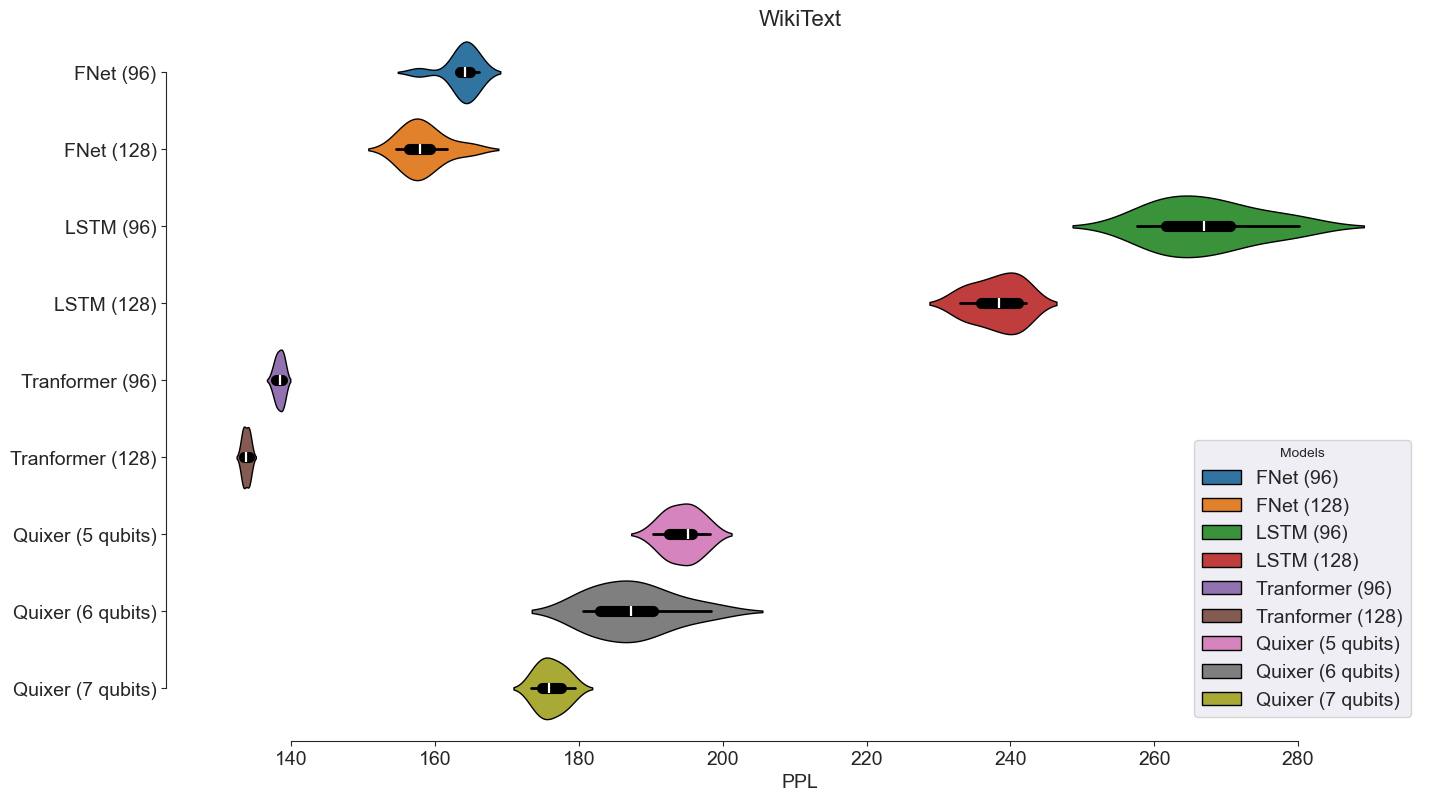

In [16]:
# plot a boxplot of the each column of the DataFrame
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=df_pivot, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=8, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Models')
plt.xlabel('PPL', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Combine postselection probabilities in a single DataFrame with the model names as columns
postselection_prob = pd.concat([postselection_prob_5qbits, postselection_prob_6qbits, postselection_prob_7qbits], axis=1)
postselection_prob.columns = ['Quixer (5 qubits)', 'Quixer (6 qubits)', 'Quixer (7 qubits)']
# exclude all rows with values grater than 0.5
post_stats = postselection_prob.describe()

In [18]:
# create a latex table with the stats
latex_table = post_stats.to_latex(float_format="%.4f")
print(latex_table)

\begin{tabular}{lrrr}
\toprule
 & Quixer (5 qubits) & Quixer (6 qubits) & Quixer (7 qubits) \\
\midrule
count & 788654.0000 & 58885.0000 & 730386.0000 \\
mean & 0.1088 & 0.0430 & 0.0568 \\
std & 0.0406 & 0.0164 & 0.0342 \\
min & 0.0200 & 0.0222 & 0.0041 \\
25% & 0.0730 & 0.0325 & 0.0342 \\
50% & 0.1138 & 0.0391 & 0.0523 \\
75% & 0.1398 & 0.0520 & 0.0770 \\
max & 0.5711 & 0.3205 & 0.6658 \\
\bottomrule
\end{tabular}



In [19]:
postselection_prob = postselection_prob[postselection_prob <= 0.5]

/var/folders/m0/92gfbc6x10s7fdvbqfp73yqh0000gn/T/ipykernel_12127/4053513991.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


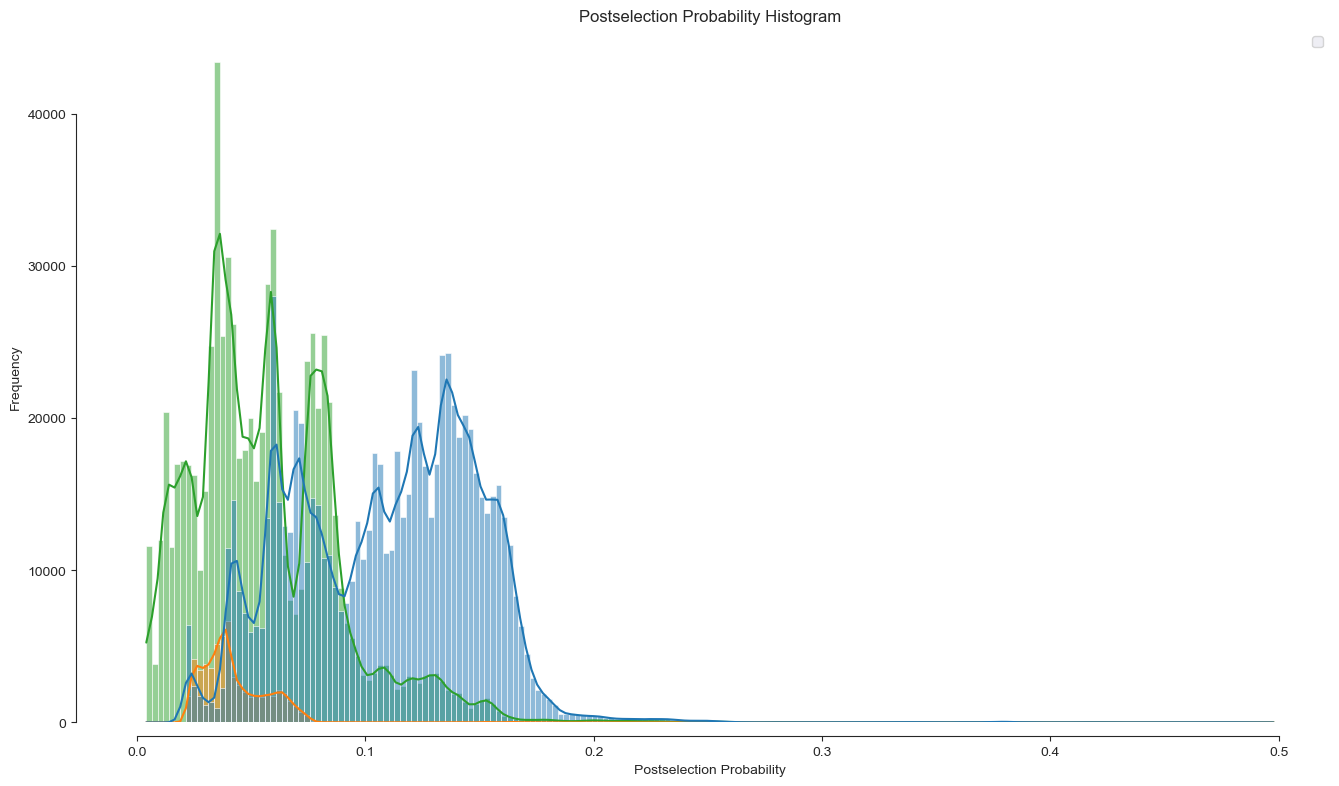

In [20]:
# plot the histogram of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.histplot(postselection_prob, bins=200, kde=True, color='green', legend=False)
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title('Postselection Probability Histogram')
plt.ylabel('Frequency')
plt.xlabel('Postselection Probability')
plt.legend(loc='upper right')
#plt.xlim(0, 0.03)
plt.savefig('PennTreeBank/trained_models_6qbits/postselection_prob_histogram_6qbits.png', dpi=300)

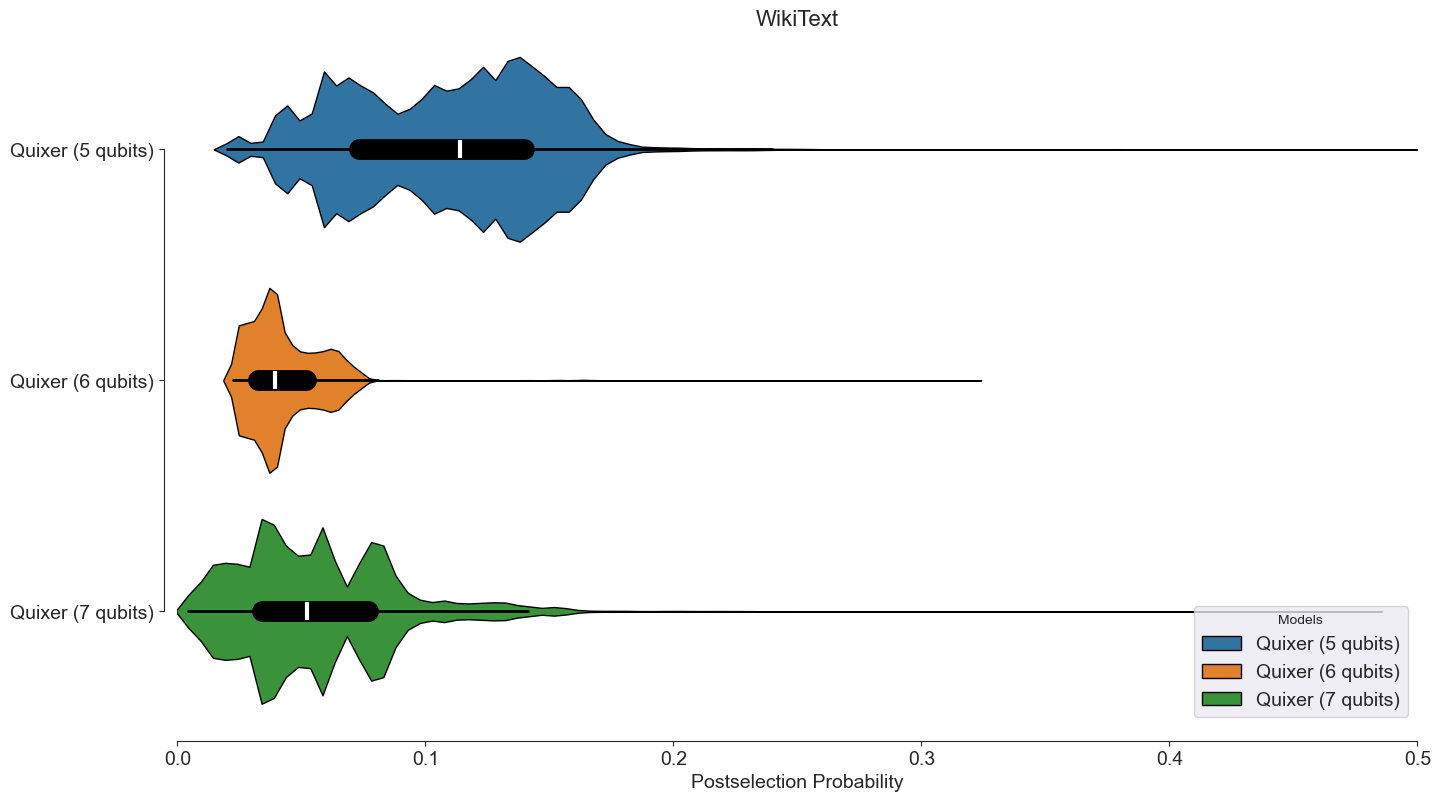

In [21]:
# plot the Half violin plot of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=postselection_prob, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=15, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Model', fontsize=14)
plt.xlabel('Postselection Probability', fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# limit the x-axis to the range [0, 0.05]
plt.xlim(0, 0.5)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_postselection_prob.png', dpi=300, bbox_inches='tight')